# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [61]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np

In [2]:
#Your code here
metadata= pd.read_csv("schema.csv")
metadata

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
...,...,...,...
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners


In [11]:
data = pd.read_csv("multipleChoiceResponses_cleaned.csv", encoding = 'latin1')
data

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26389,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26390,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000076,NaN
26391,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26392,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


(26394, 230)

In [16]:
data.isna().sum()

GenderSelect                        105
Country                            6635
Age                                6844
EmploymentStatus                   6532
StudentStatus                     25088
                                  ...  
JobFactorLeaderReputation         22993
JobFactorDiversity                22984
JobFactorPublishingOpportunity    22970
exchangeRate                      21895
AdjustedCompensation              22051
Length: 230, dtype: int64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [117]:
data.FormalEducation.value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [20]:
#Your code here
import flatiron_stats as fs

In [ ]:
# Hypothesis
# Null Hypothesis: There is no difference in Salaries between data scientists with masters degree and those with Bachelor's degree
#Alternative hypothesis: Data scientistis with masters degree earn more than those with bachelor's degree

#2 means one tail because of more than (>)

In [52]:
#create 2 groups
# a: adjusted compensation for those with masters degree
# b: adjusted compensation for those with bachelors degree
a = data[data['FormalEducation']=="Master's degree"]['AdjustedCompensation']
b = data[data['FormalEducation']=="Bachelor's degree"]['AdjustedCompensation']

#drop null values

a = a.dropna()
b = b.dropna()
print("master's degree:", '\n', a.describe(), '\n' "Bachelor's degree:", b.describe(), '\n')
print(b.value_counts)

master's degree: 
 count    1.990000e+03
mean     6.913990e+04
std      1.355272e+05
min      0.000000e+00
25%      2.186800e+04
50%      5.381217e+04
75%      9.200000e+04
max      4.498900e+06
Name: AdjustedCompensation, dtype: float64 
Bachelor's degree: count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64 

<bound method IndexOpsMixin.value_counts of 8         64184.800
9         20882.400
11         1483.900
21        20000.000
25        10858.848
            ...    
26031     39050.000
26072     31878.000
26101      3336.000
26185     50000.000
26195    100449.384
Name: AdjustedCompensation, Length: 1107, dtype: float64>


In [62]:
scipy.stats.ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=0.43786693335411514, pvalue=0.6615527890254489)

In [78]:
print("Welch t test:", fs.welch_t(a,b))
print("Welch degree of freedom:", fs.welch_df(a, b))
print("Welch pvalue:", fs.p_value_welch_ttest(a, b, two_sided=False))

Welch t test: 0.43786693335411514
Welch degree of freedom: 1350.0828973008781
Welch pvalue: 0.33077639451272445


In [80]:
""" pvalue is below 0.05 alpha value, therefore reject the null hypothesis"""

' pvalue is below 0.05 alpha value, therefore reject the null hypothesis'

In [106]:
#compare the sample size, mean, median, for adjusted compensation between master's and bachelor's degree
print("Master's sample size:", len(a), "   "  "Bachelor's sample size:", len(b) )
print("Masters mean:", round(a.mean(), 2),   "    "    "Bachelor's Mean:", round(b.mean(), 2))
print("Masters Median:", round(a.median(), 2),   "    "    "Bachelor's Median:", round(b.median(), 2))
print("Masters Max:", round(a.max(), 2),  "   "      "Bachelor's Max:", round(b.max(), 2))

Master's sample size: 1990    Bachelor's sample size: 1107
Masters mean: 69139.9     Bachelor's Mean: 64887.1
Masters Median: 53812.17     Bachelor's Median: 38399.4
Masters Max: 4498900.0    Bachelor's Max: 9999999.0


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

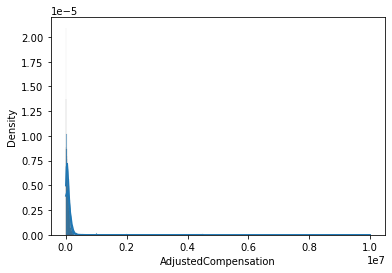

In [205]:
#visualize
sns.histplot(a, stat= 'density', kde=True)
sns.histplot(b, stat= 'density', kde=True)

In [241]:
# remove outliers using +/-3 standard deviations
a_mu=a.mean()
a_std=a.std()
a_limit=s1_mu+(2*a_std)
a_limit

340194.3168803656

In [242]:
b_mu=b.mean()
b_std=b.std()
b_limit=b_mu+(2*b_std)
b_limit

678758.8427705754

In [243]:
#let a2 represent master's degree after removing outliers
a2=a[a<=a_limit]
a2.value_counts()

120000.0000    27
100000.0000    27
59791.3000     26
71749.5600     26
150000.0000    25
               ..
12143.6928      1
6465.3920       1
29235.3600      1
47000.0000      1
999.1200        1
Name: AdjustedCompensation, Length: 916, dtype: int64

In [244]:
#let b2 represent bachelor's degree after removing outliers
b2=b[b<=b_limit]
b2.value_counts()

85000.000     16
110000.000    14
100000.000    13
60000.000     13
80000.000     12
              ..
39462.258      1
29178.000      1
350000.000     1
2164.760       1
1368.000       1
Name: AdjustedCompensation, Length: 646, dtype: int64

In [245]:
scipy.stats.ttest_ind(a2, b2, equal_var=False)

Ttest_indResult(statistic=4.272897060632971, pvalue=2.0146576593691826e-05)

In [246]:
#compare the sample size, mean, median, for adjusted compensation between master's and bachelor's degree
print("After Removing Outliers:")
print("Master's sample size:", len(a2), "   "  "Bachelor's sample size:", len(b2) )
print("Masters mean:", round(a2.mean(), 2),   "    "    "Bachelor's Mean:", round(b2.mean(), 2))
print("Masters Median:", round(a2.median(), 2),   "    "    "Bachelor's Median:", round(b2.median(), 2))
print("Masters Max:", round(a2.max(), 2),  "   "      "Bachelor's Max:", round(b2.max(), 2))

After Removing Outliers:
Master's sample size: 1980    Bachelor's sample size: 1104
Masters mean: 63123.54     Bachelor's Mean: 54193.86
Masters Median: 53248.45     Bachelor's Median: 38345.78
Masters Max: 300000.0    Bachelor's Max: 550000.0


C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

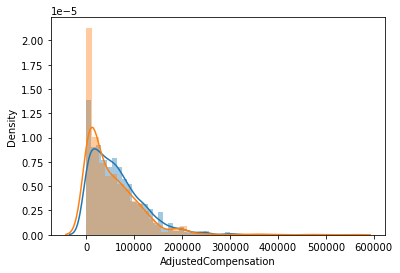

In [240]:
#visualize
sns.distplot(a2)
sns.distplot(b2)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [264]:
# bachelor's = b= s2
# doctorate = s1
s1 = data[data['FormalEducation']=="Doctoral degree"]['AdjustedCompensation']
s1 = s1.dropna()
s1.value_counts

<bound method IndexOpsMixin.value_counts of 22       100000.000
32       172144.440
34       133000.000
61        15000.000
72        43049.736
            ...    
25875     71749.560
25966     12000.000
26012    123553.200
26038    170000.000
26203    200000.000
Name: AdjustedCompensation, Length: 967, dtype: float64>

In [127]:
s1.shape

(967,)

In [120]:
# bachelor's initialized as b above is equal to s2
s2=b
s2

8         64184.800
9         20882.400
11         1483.900
21        20000.000
25        10858.848
            ...    
26031     39050.000
26072     31878.000
26101      3336.000
26185     50000.000
26195    100449.384
Name: AdjustedCompensation, Length: 1107, dtype: float64

In [265]:
#your code here
#mean median sample size and t test before removing outliers

print("Mean values:", '\n', "s1:", round(s1.mean(), 2), '\n', "s2:", round(b.mean(), 2))
print("Median values:", '\n', "s1:", round(s1.median(), 2), '\n', "s2:", round(b.median(), 2))
print("Sample Sizes:", '\n', "s1:", len(s1), '\n', "s2:", len(b))

print("Welch's t test pvalue:", fs.p_value_welch_ttest(s1, b, two_sided=False)) 

Mean values: 
 s1: 29566175.76 
 s2: 64887.1
Median values: 
 s1: 74131.92 
 s2: 38399.4
Sample Sizes: 
 s1: 967 
 s2: 1107
Welch's t test pvalue: 0.15682381994720251


In [253]:
# define outliers
# remove outliers
# calculate IQR and upper and lower fence for s1
s1_q1 = s1.quantile(0.25)
s1_q3 = s1.quantile(0.75)
s1_IQR = s1_q3 - s1_q1
s1_upper_fence = s1_q3 + (1.5*s1_IQR)
s1_lower_fence = s1_q1 - (1.5*s1_IQR)

print("s1 upper limit:", s1_upper_fence, '\n', "s1 upper limit:", s2_lower_fence)


s1 upper limit: 240000.0 
 s1 upper limit: -92181.00000000003


In [268]:
# let s1a rep s1 after removal of utliers
s1a = s1[s1 <= s1_upper_fence]
s1a

22       100000.000
32       172144.440
34       133000.000
61        15000.000
72        43049.736
            ...    
25875     71749.560
25966     12000.000
26012    123553.200
26038    170000.000
26203    200000.000
Name: AdjustedCompensation, Length: 937, dtype: float64

In [263]:
#find mean, median, sample size, and t-test after removal of outliers from doctorate

print("Mean values:", '\n', "s1:", round(s1a.mean(), 2), '\n', "s2:", round(b.mean(), 2))
print("Median values:", '\n', "s1:", round(s1a.median(), 2), '\n', "s2:", round(b.median(), 2))
print("Sample Sizes:", '\n', "s1:", len(s1a), '\n', "s2:", len(b))

print("Welch's t test pvalue:", fs.p_value_welch_ttest(s1a, b, two_sided=False)) 

Mean values: 
 s1: 80020.73 
 s2: 64887.1
Median values: 
 s1: 71749.56 
 s2: 38399.4
Sample Sizes: 
 s1: 937 
 s2: 1107
Welch's t test pvalue: 0.05374476166594522


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [173]:
#ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols
FormalEducation = data['FormalEducation']
AdjustedCompensation= data['AdjustedCompensation']

formula = "AdjustedCompensation ~ FormalEducation"
linear_model = ols(formula, data).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                       sum_sq      df         F    PR(>F)
FormalEducation  6.540294e+17     6.0  0.590714  0.738044
Residual         7.999414e+20  4335.0       NaN       NaN


In [ ]:
# remove outliers
#then do ANOVA test

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!